## Metody Nieparametryczne w Statystyce
# Zadanie 9
Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w teście Kołmogorowa w przypadku weryfikacji zgodności z rozkładem NIG oraz z rozkładem gamma o różnych wartościach parametrów. Należy porównać wyniki klasycznego sposobu testowania i testowania z wykorzystaniem PIT (probability integral transform).
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek.

In [1]:
import numpy as np, pandas as pd
from scipy.stats import kstest, norminvgauss, gamma, uniform
import matplotlib.pyplot as plt
from tqdm import tqdm

2. Badanie odsetku odrzuceń prawdziwej hipotezy głównej (błąd I rodzaju) dla rozkładów NIG i gamma.

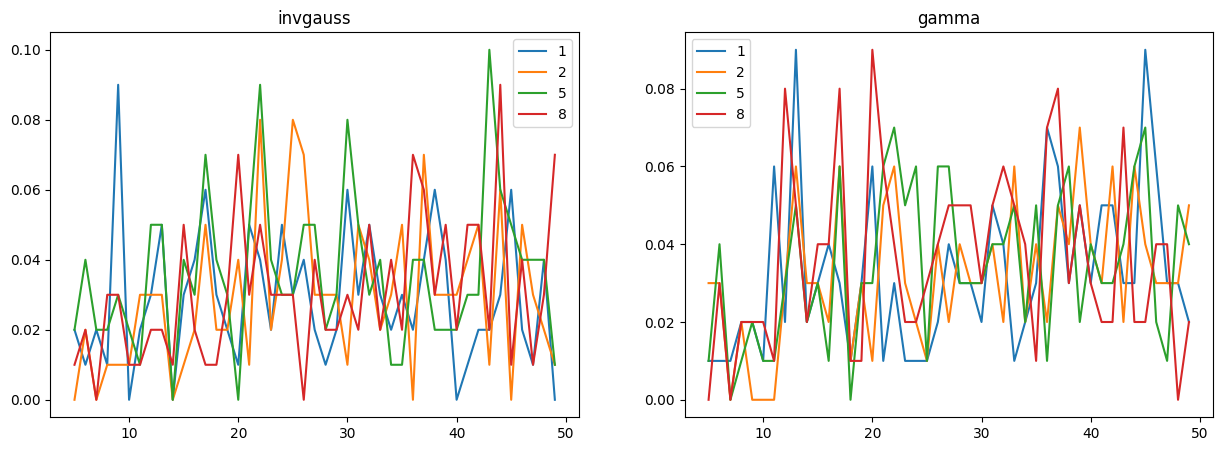

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for k in [0, 1]:
    results = pd.DataFrame(columns=["1", "2", "5", "8"])
    buf = []
    print("Testowanie rozkładu ", "invgauss" if k == 0 else "gamma")
    for n in tqdm(range (5, 50)):
        for i in range (0, 100):
            for a in [1.25, 2.5, 5, 6.75]:
                # generowanie próbek z rozkładów NIG(z ustalonym parametrem a oraz losowym parametrem b)
                # oraz gamma(z ustalonym parametrem a)
                b = 0.5*a
                xnig1 = norminvgauss.rvs(a, b, size=n)
                xnig2 = norminvgauss.rvs(a, b, size=n)
                xgamma1 = gamma.rvs(a, size=n)
                xgamma2 = gamma.rvs(a, size=n)
                
                #testy - z różnymi próbkami zależnie od iteracji algorytmu
                if (k == 0):
                    buf.append(kstest(xnig1, xnig2)[1] < .05)
                else:
                    buf.append(kstest(xgamma1, xgamma2)[1] < .05)

        results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
        buf.clear()
    results.plot(ax = axes[k], title = "invgauss" if k == 0 else "gamma")

3. Badanie odsetku odrzuceń prawdziwej hipotezy zerowej dla rozkładów NIG i gamma z wykorzystaniem PIT.

5 ,  0 ,  1.25
5 ,  0 ,  2.5
5 ,  0 ,  5
5 ,  0 ,  6.75
5 ,  1 ,  1.25
5 ,  1 ,  2.5
5 ,  1 ,  5
5 ,  1 ,  6.75
5 ,  2 ,  1.25
5 ,  2 ,  2.5
5 ,  2 ,  5
5 ,  2 ,  6.75
5 ,  3 ,  1.25
5 ,  3 ,  2.5
5 ,  3 ,  5
5 ,  3 ,  6.75
5 ,  4 ,  1.25
5 ,  4 ,  2.5
5 ,  4 ,  5
5 ,  4 ,  6.75
5 ,  5 ,  1.25
5 ,  5 ,  2.5
5 ,  5 ,  5
5 ,  5 ,  6.75
5 ,  6 ,  1.25
5 ,  6 ,  2.5
5 ,  6 ,  5
5 ,  6 ,  6.75
5 ,  7 ,  1.25
5 ,  7 ,  2.5
5 ,  7 ,  5
5 ,  7 ,  6.75
5 ,  8 ,  1.25
5 ,  8 ,  2.5
5 ,  8 ,  5
5 ,  8 ,  6.75
5 ,  9 ,  1.25
5 ,  9 ,  2.5
5 ,  9 ,  5
5 ,  9 ,  6.75
6 ,  0 ,  1.25
6 ,  0 ,  2.5
6 ,  0 ,  5
6 ,  0 ,  6.75
6 ,  1 ,  1.25
6 ,  1 ,  2.5
6 ,  1 ,  5
6 ,  1 ,  6.75
6 ,  2 ,  1.25
6 ,  2 ,  2.5
6 ,  2 ,  5
6 ,  2 ,  6.75
6 ,  3 ,  1.25
6 ,  3 ,  2.5
6 ,  3 ,  5
6 ,  3 ,  6.75
6 ,  4 ,  1.25
6 ,  4 ,  2.5
6 ,  4 ,  5
6 ,  4 ,  6.75
6 ,  5 ,  1.25
6 ,  5 ,  2.5
6 ,  5 ,  5
6 ,  5 ,  6.75
6 ,  6 ,  1.25
6 ,  6 ,  2.5
6 ,  6 ,  5
6 ,  6 ,  6.75
6 ,  7 ,  1.25
6 ,  7 ,  2.5
6 ,  7 ,  5
6 ,  7 

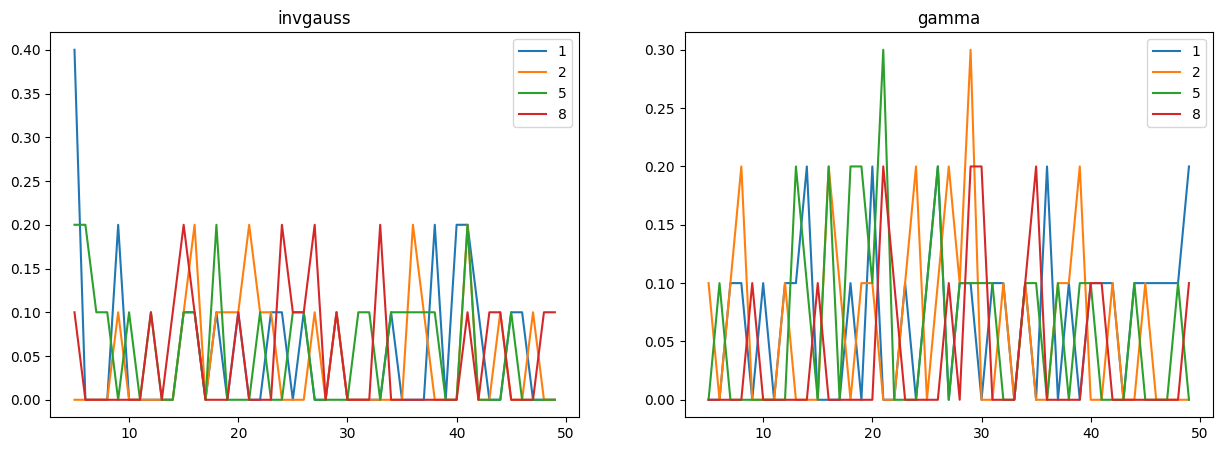

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for k in [0, 1]:    
    results = pd.DataFrame(columns=["1.25", "2.5", "5", "6.75"])
    buf = []
    for n in range (5, 50):
        for i in range (0, 100):
            for a in [1.25, 2.5, 5, 6.75]:
                # generowanie próbek z rozkładów NIG(z ustalonym parametrem a oraz losowym parametrem b)
                # oraz gamma(z ustalonym parametrem a)
                b = a - np.random.rand()
                xnig = norminvgauss.cdf(norminvgauss.rvs(a, b, size=n), a, b)
                xgamma = gamma.cdf(gamma.rvs(a, size=n), a)
                print(n, ", ", i, ", ", a)
                #testy - z różnymi próbkami zależnie od iteracji algorytmu
                if (k == 0):
                    buf.append(kstest(xnig, uniform.cdf)[1] < .05)
                else:
                    buf.append(kstest(xgamma, uniform.cdf)[1] < .05)

        results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
        buf.clear()
    results.plot(ax = axes[k], title = "invgauss" if k == 0 else "gamma")